In [1]:
import os
import math
import matplotlib.pyplot as plt
import torch

from network import DDPGAgent
from utils import *


def train(batch_size=128, critic_lr=1e-3, actor_lr=1e-4, max_episodes=1000, max_steps=500, gamma=0.99, tau=1e-3,
          buffer_maxlen=100000):
    env = make("InvertedPendulumCustom-v0")

    max_episodes = max_episodes
    max_steps = max_steps
    batch_size = batch_size

    gamma = gamma
    tau = tau
    buffer_maxlen = buffer_maxlen
    critic_lr = critic_lr
    actor_lr = actor_lr

    agent = DDPGAgent(env, gamma, tau, buffer_maxlen, critic_lr, actor_lr, True, max_episodes * max_steps)
    episode_rewards = mini_batch_train(env, agent, max_episodes, max_steps, batch_size)

    plt.figure()
    plt.plot(episode_rewards)
    plt.xlabel("Episodes")
    plt.ylabel("Reward")

    curr_dir = os.path.abspath(os.getcwd())
    if not os.path.isdir("models"):
        os.mkdir("models")
    torch.save(agent, curr_dir + "/models/pendulum_swingup_ddpg.pkl")




/home/xuebing/optimal_control/p2update/network.py:105: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  state_batch = torch.FloatTensor(state_batch).to(self.device)


Episode 0: -480.90237812382264
Episode 1: -493.8028597790735
Episode 2: -493.3394181087589
Episode 3: -493.99712446271957
Episode 4: -493.4907037906743
Episode 5: -494.21880671115565
Episode 6: -494.05735700143356
Episode 7: -493.24030248555084
Episode 8: -493.5715140729343
Episode 9: -493.296556173374
Episode 10: -493.09656353657886
Episode 11: -493.29077313059696
Episode 12: -491.8026612856928
Episode 13: -484.65430927429816
Episode 14: -490.8919482278582
Episode 15: -481.15664998509754
Episode 16: -486.1762727482861
Episode 17: -488.9211985155673
Episode 18: -484.07779746278436
Episode 19: -471.9553727745884
Episode 20: -453.52652978506705
Episode 21: -486.891726188099
Episode 22: -486.00824785856923
Episode 23: -490.5913516247998
Episode 24: -481.45980448393084
Episode 25: -485.421707447864
Episode 26: -484.5446124616767
Episode 27: -486.5766138726583
Episode 28: -462.0626471250613
Episode 29: -468.32414118205133
Episode 30: -309.94227592449374
Episode 31: -327.0080732144485
Episod

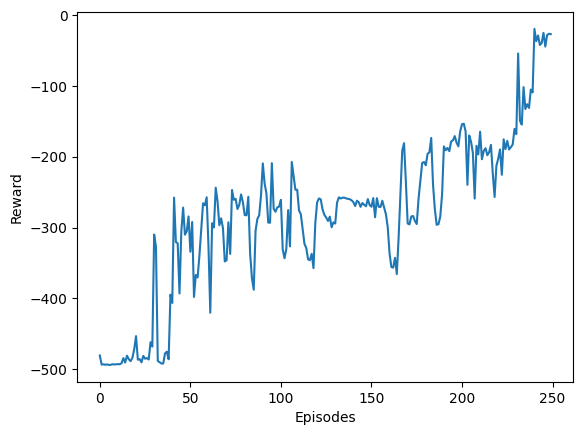

In [2]:
if __name__ == '__main__':
    train()

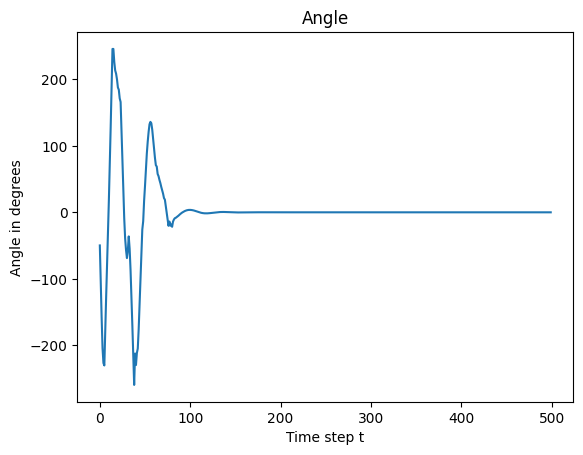

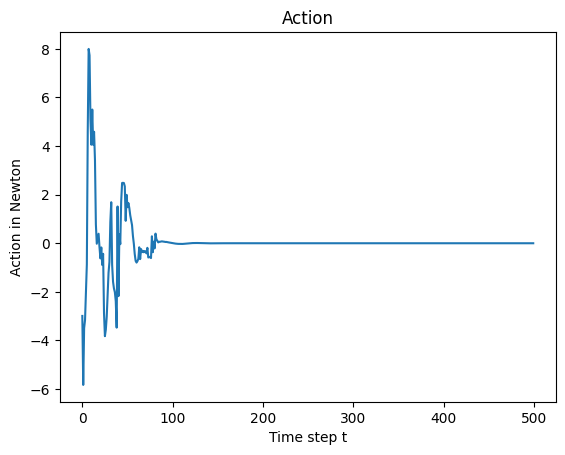

In [4]:
def evaluate():
    # print the result and plot of the agent solving the pendulum swing-up problem

    env = make("InvertedPendulumCustom-v0")

    curr_dir = os.path.abspath(os.getcwd())
    agent = torch.load(curr_dir + "/models/pendulum_swingup_ddpg.pkl")
    agent.train = False

    state,info = env.reset()
    r = 0
    theta = []
    actions = []
    for i in range(500):
        action = agent.get_action(state)
        next_state, reward, done, _ = env.step(action)
        actions.append(action)
        theta.append(math.degrees(next_state[2]))
        r += reward
        state = next_state

    env.close()

    # plot the angle and action curve , then save files
    curr_dir = os.path.abspath(os.getcwd())
    if not os.path.isdir("results"):
        os.mkdir("results")

    plt.figure()
    plt.plot(theta)
    plt.title('Angle')
    plt.ylabel('Angle in degrees')
    plt.xlabel('Time step t')
    plt.savefig(curr_dir + "/results/plot_angle.png")

    plt.figure()
    plt.plot(actions)
    plt.title('Action')
    plt.ylabel('Action in Newton')
    plt.xlabel('Time step t')
    plt.savefig(curr_dir + "/results/plot_action.png")


if __name__ == '__main__':
    evaluate()

In [5]:
import torch

# load models and resave to adapt the cpu for later simulating

model_path = "/home/xuebing/optimal_control/p2update/models/pendulum_swingup_ddpg.pkl"
cpu_model_path = "/home/xuebing/optimal_control/p2update/models/pendulum_swingup_ddpg_cpu.pkl"

model = torch.load(model_path, map_location=torch.device('cpu'))

model.actor = model.actor.to(torch.device('cpu'))
model.critic = model.critic.to(torch.device('cpu'))

torch.save(model, cpu_model_path)

print(f"Model saved to {cpu_model_path}")

Model saved to /home/xuebing/optimal_control/p2update/models/pendulum_swingup_ddpg_cpu.pkl
